# Environment Setup

In [18]:
#Import Libraries
import requests
from bs4 import BeautifulSoup
from time import sleep
from google.colab import drive
drive.mount('/content/drive')
import csv
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords
from operator import itemgetter
import math
from nltk.tokenize import word_tokenize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Collection from Websites

In [59]:
article_soup=[]


In [60]:
# defining the code to retrieve todays news from several papers

def retrieve_soup(url):

   #Specify with which web page you are going to be scraping
   page = requests.get(url)

   #Parse the HTML into the BeautifulSoup parse tree format
   soup = BeautifulSoup(page.content, 'lxml')

   #To get the title of the page
   titles = soup.select('h3')
   for items in titles:
     article_name = items.get_text()

  
     links = items.find_all("a")
    
     for link in links:
         link_url = link["href"] 
          
     if link_url.find("http")==-1:
         link_url=url+link_url
         print(link_url)
         article_soup.append(link_url)
     else:
         print("No article")


In [61]:
newssites=["https://theage.com.au", "https://www.smh.com.au", 'https://www.afr.com/', 'https://www.watoday.com.au/', 'https://www.brisbanetimes.com.au/']

for link in newssites:
  print(link)
  details=retrieve_soup(link)
print(article_soup)  

https://theage.com.au
https://theage.com.au/newsletter-signup?newsletter=explainer
No article
https://theage.com.au/puzzles
https://theage.com.au/politics/federal/renewal-not-revolution-labor-leader-anthony-albanese-lays-out-election-pitch-20211205-p59evl.html
https://theage.com.au/national/victoria/ballarat-traders-brace-for-protesters-as-freedom-leaders-try-to-salvage-movement-20211205-p59ewa.html
https://theage.com.au/national/victoria/tga-approves-jabs-for-5-11-year-olds-as-victoria-records-seven-deaths-980-new-cases-20211205-p59ev1.html
https://theage.com.au/national/victoria/stolen-laptop-liquidators-of-collapsed-melbourne-crypto-company-pursue-bitcoin-millions-20211130-p59df6.html
https://theage.com.au/sport/afl/demons-fans-flock-to-mcg-to-see-team-lift-the-cup-20211205-p59exh.html
https://theage.com.au/world/europe/it-absolutely-wakes-you-up-headbanger-prince-william-reveals-he-is-secret-fan-of-ac-dc-20211205-p59eww.html
https://theage.com.au/world/asia/villagers-flee-in-indone

Retrieving ABC News separately due to different handling of URLS

In [62]:

#Specify with which web page you are going to be scraping
page_abc = requests.get('https://www.abc.net.au/news')

#Parse the HTML into the BeautifulSoup parse tree format
soup_abc = BeautifulSoup(page_abc.content, 'lxml')

print(soup_abc.prettify())


<!DOCTYPE html>
<html data-react-hydrated="false" lang="en-AU">
 <head>
  <title data-react-helmet="true">
   ABC News (Australian Broadcasting Corporation)
  </title>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1.0" data-react-helmet="true" name="viewport"/>
  <meta content="ie=edge" data-react-helmet="true" http-equiv="x-ua-compatible"/>
  <meta content="ABC News (Australian Broadcasting Corporation)" data-react-helmet="true" name="title"/>
  <meta content="Trusted and independent source of local, national and world news. In-depth analysis, business, sport, weather and more." data-react-helmet="true" name="description"/>
  <meta content="Channel" data-react-helmet="true" property="ABC.ContentType"/>
  <meta content="coremedia" data-react-helmet="true" property="ABC.ContentSource"/>
  <meta content="PL NEWS WEB" data-react-helmet="true" name="generator"/>
  <meta content="PL NEWS WEB" data-react-helmet="true" property="ABC.Gene

In [63]:
print(article_soup)

#To get the title of the page
titles = soup_abc.select('h3')

for items in titles:
  article_name = items.get_text()
  article_title.append(article_name)
  #print(article_name)
  links = items.find_all("a")
  
  for link in links:
      print(link)
      link_url = link["href"] 
      print(link_url)
  
  if link_url.find("http")==-1:
      link_url="https://abc.net.au"+link_url
      print(link_url)
      article_soup.append(link_url)
  else:
      print("No article")
  #print(article_title)

print(article_soup)


['https://theage.com.au/newsletter-signup?newsletter=explainer', 'https://theage.com.au/puzzles', 'https://theage.com.au/politics/federal/renewal-not-revolution-labor-leader-anthony-albanese-lays-out-election-pitch-20211205-p59evl.html', 'https://theage.com.au/national/victoria/ballarat-traders-brace-for-protesters-as-freedom-leaders-try-to-salvage-movement-20211205-p59ewa.html', 'https://theage.com.au/national/victoria/tga-approves-jabs-for-5-11-year-olds-as-victoria-records-seven-deaths-980-new-cases-20211205-p59ev1.html', 'https://theage.com.au/national/victoria/stolen-laptop-liquidators-of-collapsed-melbourne-crypto-company-pursue-bitcoin-millions-20211130-p59df6.html', 'https://theage.com.au/sport/afl/demons-fans-flock-to-mcg-to-see-team-lift-the-cup-20211205-p59exh.html', 'https://theage.com.au/world/europe/it-absolutely-wakes-you-up-headbanger-prince-william-reveals-he-is-secret-fan-of-ac-dc-20211205-p59eww.html', 'https://theage.com.au/world/asia/villagers-flee-in-indonesia-as-

In [74]:
def get_article_info(url_link):
  try:
    page2 = requests.get(url_link)
    soup2 = BeautifulSoup(page2.content, 'html.parser')
    #print(soup2)
    sleep(0.5)
    content_descript = soup2.find("meta", property="og:description", content=True)
    
    content_title = soup2.find("meta", property="og:title", content=True)
    
    meta_content=soup2.find_all("meta")
    description=content_descript["content"]
    title = content_title["content"]
    
    section=""
    for tag in meta_content:
    
      if tag.get("name") == "parsely-tags":
          keywords = (tag.get("content"))
    
      if tag.get("name") == "parsely-section":
          section = (tag.get("content"))
      elif url_link.startswith('https://abc'):
          section = "Misc News"
    paper=url_link
    
    return{"Title": title, "Description": description, "Section": section, "Paper": paper} 
  except (NameError, ConnectionError, TypeError):
    return {"Title": "", "Description": "", "Section": "", "Paper": ""}

In [76]:
dataset = []
for url_link in article_soup:
  if url_link.find("www.domain")!=-1:
    print("Skipping Website Retrieval for: ", url_link)
  else:
    print("now retrieving", url_link)
    dataset.append(get_article_info(url_link))


now retrieving https://theage.com.au/newsletter-signup?newsletter=explainer
now retrieving https://theage.com.au/puzzles
now retrieving https://theage.com.au/politics/federal/renewal-not-revolution-labor-leader-anthony-albanese-lays-out-election-pitch-20211205-p59evl.html
now retrieving https://theage.com.au/national/victoria/ballarat-traders-brace-for-protesters-as-freedom-leaders-try-to-salvage-movement-20211205-p59ewa.html
now retrieving https://theage.com.au/national/victoria/tga-approves-jabs-for-5-11-year-olds-as-victoria-records-seven-deaths-980-new-cases-20211205-p59ev1.html
now retrieving https://theage.com.au/national/victoria/stolen-laptop-liquidators-of-collapsed-melbourne-crypto-company-pursue-bitcoin-millions-20211130-p59df6.html
now retrieving https://theage.com.au/sport/afl/demons-fans-flock-to-mcg-to-see-team-lift-the-cup-20211205-p59exh.html
now retrieving https://theage.com.au/world/europe/it-absolutely-wakes-you-up-headbanger-prince-william-reveals-he-is-secret-fan-

In [77]:

keys = dataset[0].keys()



with open('/content/drive/My Drive/Assessment_3/dataset.csv', 'w', newline='', encoding='utf8') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(dataset)

with open('/content/drive/My Drive/Assessment_3/article_titles.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(article_title)



# Data Wrangling


## Data Clensing

In [6]:
#Importing the dataset
df = pd.read_csv("/content/drive/My Drive/Assessment_3/dataset.csv")

df.head(15)

,Title,Description,Section,Paper
0,Newsletter Signup Redirect | The Age,NaN,newsletter-signup,https://theage.com.au/newsletter-signup?newsle...
1,"New Sudoku playable every day on the web, mobi...",NaN,puzzles,https://theage.com.au/puzzles
2,"‘Renewal, not revolution’: Labor leader Anthon...",Mr Albanese launched Labor’s unofficial electi...,Federal,https://theage.com.au/politics/federal/renewal...
3,Ballarat traders brace for protests as ‘freedo...,"Ballarat’s traders have shut their doors, hire...",Victoria,https://theage.com.au/national/victoria/ballar...
4,TGA approves jabs for 5-11 year olds as Victor...,Victoria has recorded seven deaths and 980 new...,Victoria,https://theage.com.au/national/victoria/tga-ap...
5,‘Stolen laptop’: Liquidators of collapsed Melb...,Administrators of a failed cryptocurrency comp...,Victoria,https://theage.com.au/national/victoria/stolen...
6,Demons fans flock to MCG to see team lift the cup,"On a December, not September, afternoon, and a...",AFL,https://theage.com.au/sport/afl/demons-fans-fl...
7,‘It absolutely wakes you up’: Headbanger Princ...,Prince William has spoken about his favourite ...,Europe,https://theage.com.au/world/europe/it-absolute...
8,Villagers flee in Indonesia as tallest volcano...,People have been filmed dashing away from spir...,Asia,https://theage.com.au/world/asia/villagers-fle...
9,CNN fires anchor Chris Cuomo for helping broth...,"The news organisation said, “additional inform...",North America,https://theage.com.au/world/north-america/cnn-...


Cleaning up the data by removing duplicated articles, dropping incomeplete rows, removing punctuation etc.

In [7]:
#Dropping duplicate rows from the dataset and creating the text for processing

print("The dataframe contains:" ,df.info())
df = df.drop_duplicates(subset ="Title",keep = "first", inplace = False)
df = df.dropna()

print(df)
print("The new dataframe contains:" ,df.info())

# function for text cleaning 
def clean_text(text):
   
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

#calling the text cleaning
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Description'] = df['Description'].apply(lambda x: clean_text(x))
df['Section'] = df['Section'].apply(lambda x: clean_text(x))

#creating a single field of Title and Description
df['Together']=df['Title']+df['Description']

Titles = df['Together'].str.cat(sep = '')
Titles

df = df.reset_index()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        548 non-null    object
 1   Description  538 non-null    object
 2   Section      548 non-null    object
 3   Paper        548 non-null    object
dtypes: object(4)
memory usage: 17.2+ KB
The dataframe contains: None
                                                 Title  ...                                              Paper
2    ‘Renewal, not revolution’: Labor leader Anthon...  ...  https://theage.com.au/politics/federal/renewal...
3    Ballarat traders brace for protests as ‘freedo...  ...  https://theage.com.au/national/victoria/ballar...
4    TGA approves jabs for 5-11 year olds as Victor...  ...  https://theage.com.au/national/victoria/tga-ap...
5    ‘Stolen laptop’: Liquidators of collapsed Melb...  ...  https://theage.com.au/national/victoria/stolen...
6    Demons fans flock to

,index,Title,Description,Section,Paper,Together
0,2,renewal not revolution labor leader anthony al...,mr albanese launched labor s unofficial electi...,federal,https://theage.com.au/politics/federal/renewal...,renewal not revolution labor leader anthony al...
1,3,ballarat traders brace for protests as freedom...,ballarat s traders have shut their doors hired...,victoria,https://theage.com.au/national/victoria/ballar...,ballarat traders brace for protests as freedom...
2,4,tga approves jabs for year olds as victoria re...,victoria has recorded seven deaths and new cas...,victoria,https://theage.com.au/national/victoria/tga-ap...,tga approves jabs for year olds as victoria re...
3,5,stolen laptop liquidators of collapsed melbour...,administrators of a failed cryptocurrency comp...,victoria,https://theage.com.au/national/victoria/stolen...,stolen laptop liquidators of collapsed melbour...
4,6,demons fans flock to mcg to see team lift the cup,on a december not september afternoon and a su...,afl,https://theage.com.au/sport/afl/demons-fans-fl...,demons fans flock to mcg to see team lift the ...
5,7,it absolutely wakes you up headbanger prince w...,prince william has spoken about his favourite ...,europe,https://theage.com.au/world/europe/it-absolute...,it absolutely wakes you up headbanger prince w...
6,8,villagers flee in indonesia as tallest volcano...,people have been filmed dashing away from spir...,asia,https://theage.com.au/world/asia/villagers-fle...,villagers flee in indonesia as tallest volcano...
7,9,cnn fires anchor chris cuomo for helping broth...,the news organisation said additional informat...,north america,https://theage.com.au/world/north-america/cnn-...,cnn fires anchor chris cuomo for helping broth...
8,10,socceroos urged to pick totti s aussie protege...,cristian volpato was told by two a league club...,soccer,https://theage.com.au/sport/soccer/socceroos-u...,socceroos urged to pick totti s aussie protege...
9,11,cambage says she has zero interest in home wor...,the australian opals will on monday name their...,basketball,https://theage.com.au/sport/basketball/big-cal...,cambage says she has zero interest in home wor...


In [8]:
#
df['Section'] = df['Section'].replace({'basketball': 'sport', 'cricket': 'sport', 'afl': 'sport', 'tennis': 'sport', 'motorsport': 'sport',
                                       'soccer': 'sport', 'racing': 'sport', 'music': 'entertainment', 'books': 'entertainment', 'celebrity': 'entertainment',
                                       'movies': 'entertainment', 'art design': 'entertainment', 'fashion': 'entertainment', 'theatre': 'entertainment',
                                       'tv radio': 'entertainment', 'artsandculture': 'entertainment', 'foodandwine': 'entertainment', 'travel': 'entertainment', 'rugby union': 'sport'})
#if link_url.find("http")==-1:
i=0

for papers in df['Paper']:
  if 'https://theage' in papers:
    df['Paper'][i]='The Age'
  elif "https://abc" in papers:
    df['Paper'][i]='ABC News'
  elif "https://afr" in papers:
    df['Paper'][i]='Aust Fin Review'
  elif "https://www.watoday" in papers:
    df['Paper'][i]='WA Today'
  elif "https://www.smh" in papers:
    df['Paper'][i]='SMH'
  else:
    df['Paper'][i]='Brisbane Times'
  i=i+1

# df['colour_abr'].fillna('OT', inplace=True)
df.head(20)

,index,Title,Description,Section,Paper,Together
0,2,renewal not revolution labor leader anthony al...,mr albanese launched labor s unofficial electi...,federal,The Age,renewal not revolution labor leader anthony al...
1,3,ballarat traders brace for protests as freedom...,ballarat s traders have shut their doors hired...,victoria,The Age,ballarat traders brace for protests as freedom...
2,4,tga approves jabs for year olds as victoria re...,victoria has recorded seven deaths and new cas...,victoria,The Age,tga approves jabs for year olds as victoria re...
3,5,stolen laptop liquidators of collapsed melbour...,administrators of a failed cryptocurrency comp...,victoria,The Age,stolen laptop liquidators of collapsed melbour...
4,6,demons fans flock to mcg to see team lift the cup,on a december not september afternoon and a su...,sport,The Age,demons fans flock to mcg to see team lift the ...
5,7,it absolutely wakes you up headbanger prince w...,prince william has spoken about his favourite ...,europe,The Age,it absolutely wakes you up headbanger prince w...
6,8,villagers flee in indonesia as tallest volcano...,people have been filmed dashing away from spir...,asia,The Age,villagers flee in indonesia as tallest volcano...
7,9,cnn fires anchor chris cuomo for helping broth...,the news organisation said additional informat...,north america,The Age,cnn fires anchor chris cuomo for helping broth...
8,10,socceroos urged to pick totti s aussie protege...,cristian volpato was told by two a league club...,sport,The Age,socceroos urged to pick totti s aussie protege...
9,11,cambage says she has zero interest in home wor...,the australian opals will on monday name their...,sport,The Age,cambage says she has zero interest in home wor...


In [9]:
df.to_csv('/content/drive/My Drive/Assessment_3/cleaned_dataset.csv')

## Exploratory Data Analysis


In [19]:
print(len(Titles))

71668


In [20]:
tok_titles = word_tokenize(Titles)
len(tok_titles)

11694

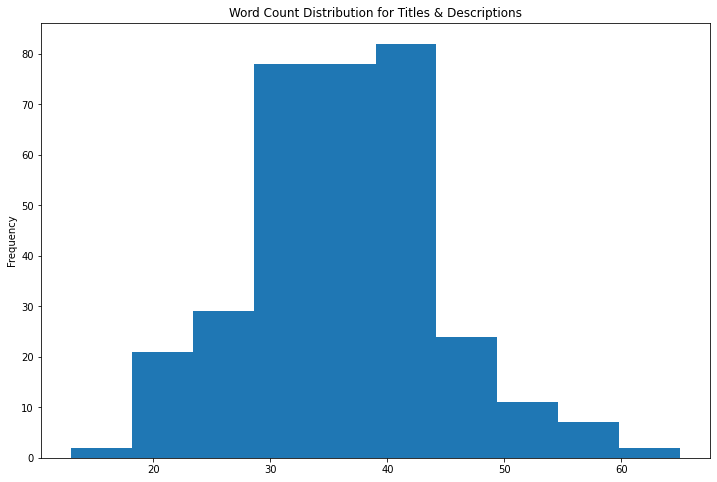

In [21]:
# Calculating the word count for Newspaper Headlines articles titles and descriptions
df['word_count'] = df['Together'].apply(lambda x: len(str(x).split()))# Plotting the word count
word_count = df['word_count'].plot(
    kind='hist',
    bins = 10,
    figsize = (12,8),
    title ='Word Count Distribution for Titles & Descriptions')

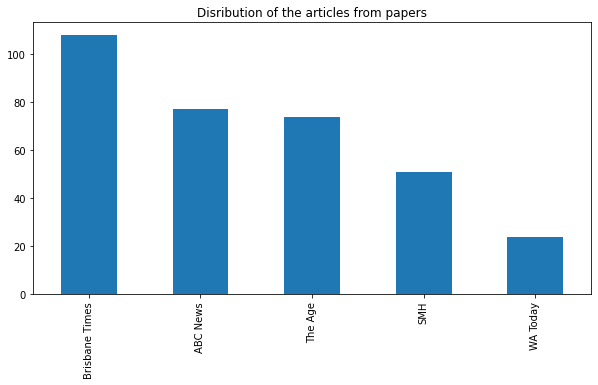

In [22]:
# Distribution of articles from various newspapers
dist_plot = df['Paper'].value_counts().plot(x = 'date', y ='count', kind = 'bar', title = "Disribution of the articles from papers", figsize = (10,5))


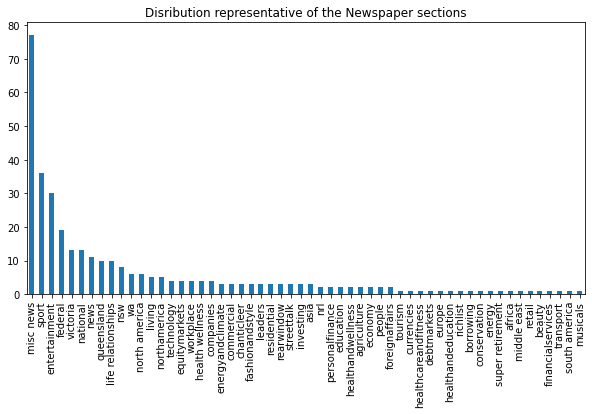

In [23]:
# Distribution of news categories 
dist_plot = df['Section'].value_counts().plot(x = 'date', y ='count', kind = 'bar', title = "Disribution representative of the Newspaper sections", figsize = (10,5))

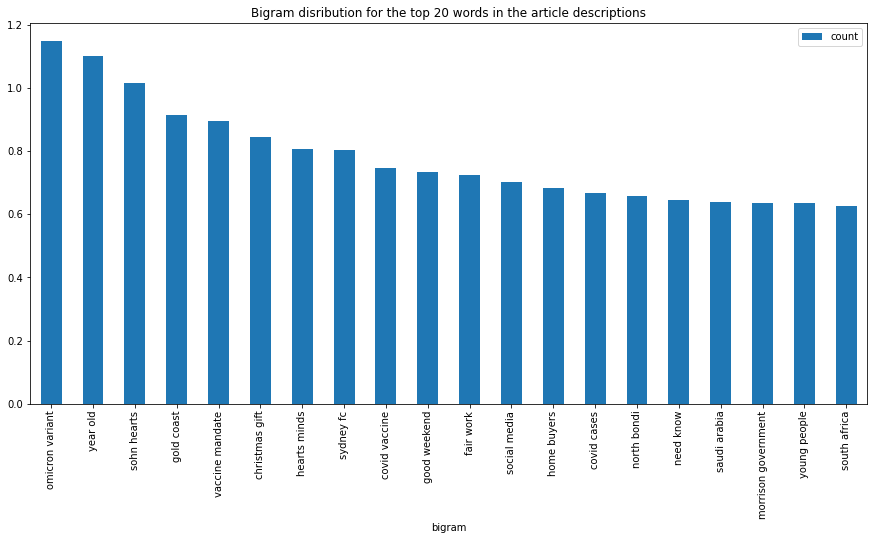

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Together'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the article descriptions", figsize = (15,7), )

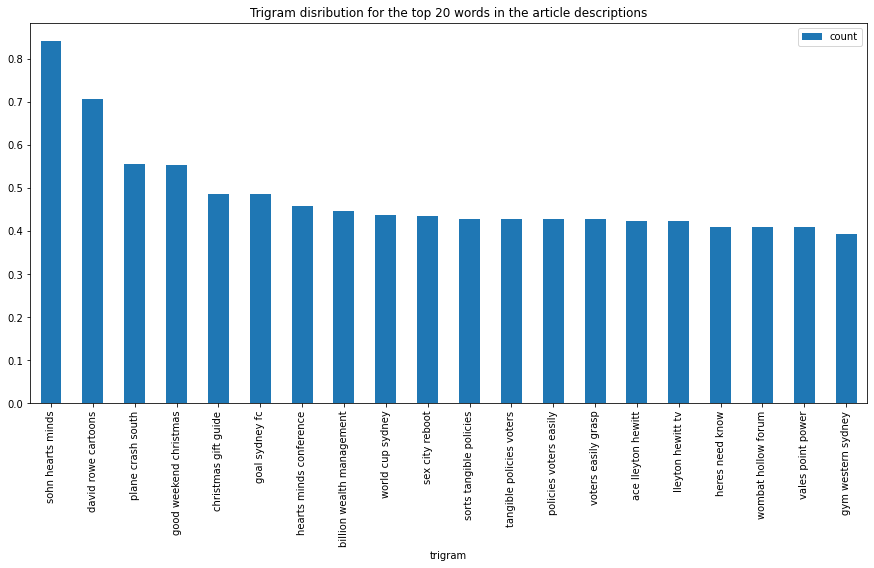

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Together'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the bigram distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the article descriptions", figsize = (15,7), )

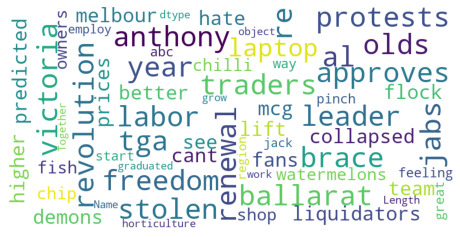

In [26]:
# Word cloud
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

wordcloud = WordCloud( max_font_size = 50, width = 800, height = 400, background_color = 'white', max_words = 1000
                      ).generate(str(df['Together']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

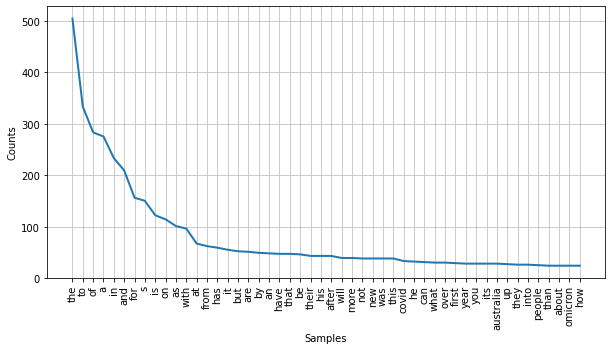

In [27]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_titles)
Freq_dist_nltk.plot(50, cumulative=False)


# New Section

## SUb section
